# Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


## Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

As we have all the neccessary information of data now we will import all the essential libraries that are needed for performing all the task such as importing dataset, EDA, Removing Outliers and Skewness, Scaling, Model Building, Predicting, exporting the model, Checking the Accuracy

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import plotly.express as px
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, power_transform, OrdinalEncoder
warnings.filterwarnings('ignore')

As we have imported all the essential libraries now we will import the data into working environment so we can use the data and perform all the tasks

In [2]:
#importing data using pandas.read_csv() and saving it in out own variable
ds = pd.read_csv('~/Desktop/Datatrained/Abalone/abalone.csv')

Here we have imported the dataset from abalone.csv to our own variable ds and now we will see what kind of data abalone contains by seeing the rows and columns by using ds.head() it will display first 5 rows of every column

In [3]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


By looking at the above dataset we come to know that the dataset consist of float, int, object kind of variables

Now for getting a clear vision we will use ds.info() it will give all the information about the dataset like what is the datatype, how much memory it is using, is the column having null values or not and what is the count of that column

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From above we can see Sex as object and Rings as int64 rest all the columns are float64

Lets see some statistical information about the column by using ds.describe()

In [5]:
ds.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


By looking at the statistics we are able to see that there is not large difference between the mean value and the Standard Deviation that means that the dataset has very less number of outliers and we can easily fixit afterwords.

Lets Visualize the statistical information by which we can easily figure out the dataset

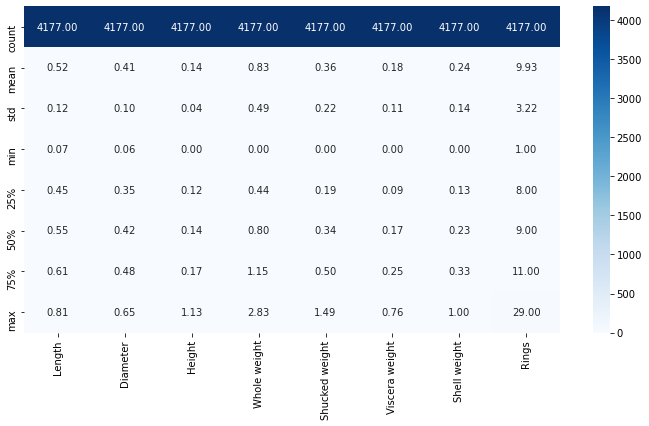

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), annot=True, cmap = 'Blues', fmt='.2f')

By looking at the above Visualization also we come to figure out that the difference between the statistics are very small

lets see some more information about the data

In [7]:
r, c = ds.shape
print("Length of the rows are {}, and columns are {}".format(r,c))

Length of the rows are 4177, and columns are 9


By looking above we can see that there are 4177 number of rows and 9 columns in dataset

lets convert the Sex column to integer by using label encoder

In [8]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


lets see if there are any missing values in the datset or not if present we will fix it by using mean, median or mode operations

In [9]:
ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
le = LabelEncoder()

In [11]:
dsnew = le.fit_transform(ds['Sex'])
dsnew = pd.DataFrame(dsnew, columns = ['Sex'])

In [12]:
dsnew.head()

,Sex
0,2
1,2
2,0
3,2
4,1


In [13]:
ds['Sex'] = dsnew['Sex']

In [14]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


By looking at the above dataset we figure out that we have successfully performed label encoding in 'Sex' Column and divided the column into different classes lets see how many classes are there in sex column by using value_counts()

In [15]:
ds['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

By looking at above tab we come to know that there are three classes 0,1,2 here 1 is Infant, 2 is Male and 0 is Female label encoder encodes in alphabetical oreder so we got Female first then Infant and atlast Male

lets see a Visualization graph of the 'Sex' Column

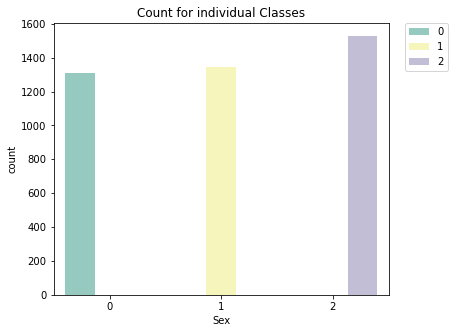

In [16]:
plt.figure(figsize=(6,5))
plt.title("Count for individual Classes")
sns.countplot('Sex', data = ds, palette='Set3', hue = 'Sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This is the Visualization of count_values() of 'Sex' Column

### Lets start our EDA process to know more about the dataset and clearly understand the data easily 

In [17]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64


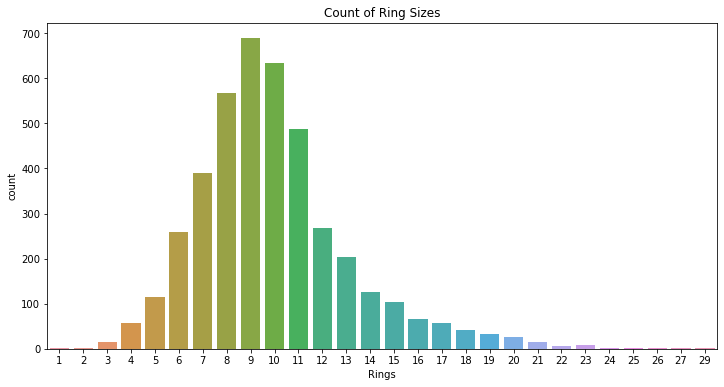

In [18]:
print(ds['Rings'].value_counts())
plt.figure(figsize=(12,6))
plt.title("Count of Ring Sizes")
sns.countplot(ds['Rings'])

By looking at the above graph we can tell that the heighest count is for 9 rings and soo on

Lets see if Whole Weight has some relation on rings or not

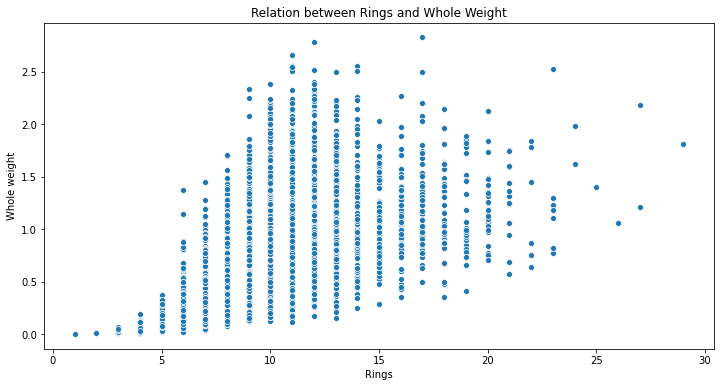

In [19]:
plt.figure(figsize = (12,6))
plt.title("Relation between Rings and Whole Weight")
plt.xlabel("No of Rings")
plt.ylabel("Whole Weight")
sns.scatterplot('Rings', 'Whole weight', data=ds)

From above graph we can easily identify that if weight increases the rings also increases

Lets see all the columns with respect to the rings

In [20]:
columns = ds.columns

In [21]:
columns = columns.drop('Rings')
print(columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


Here we have saved all the column names except Rings so we can find relation between all the column with rings except rings with rings

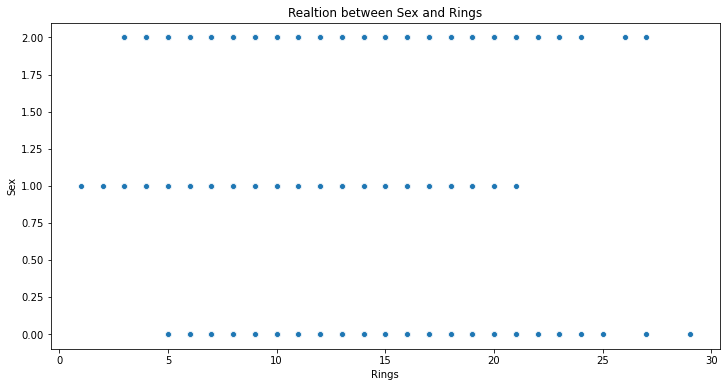

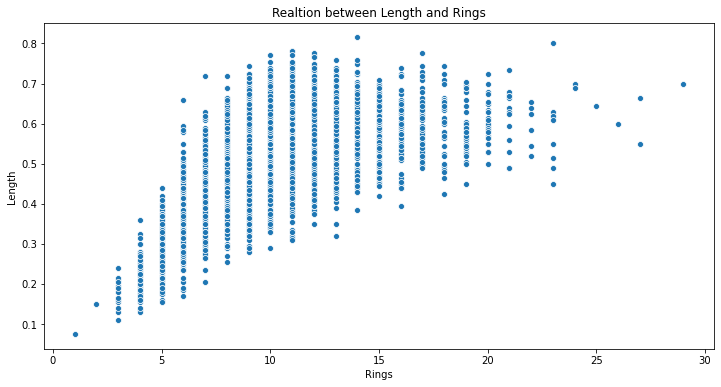

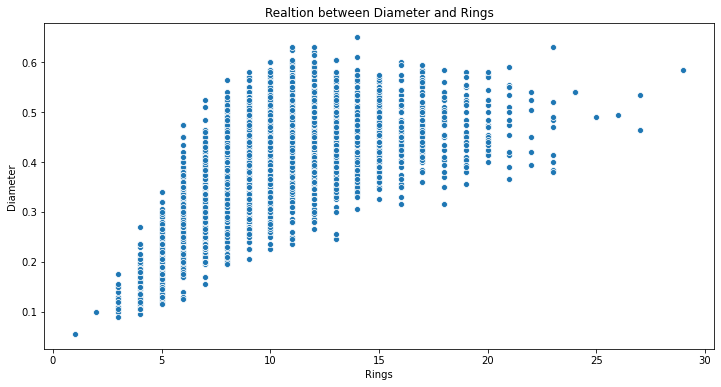

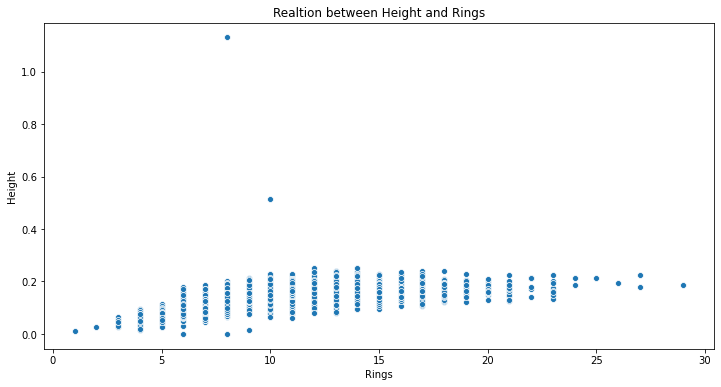

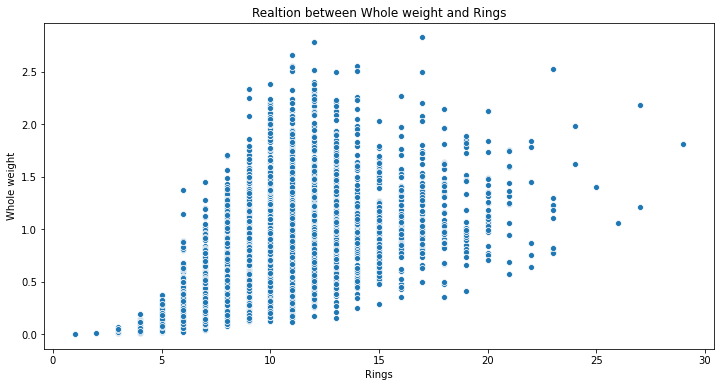

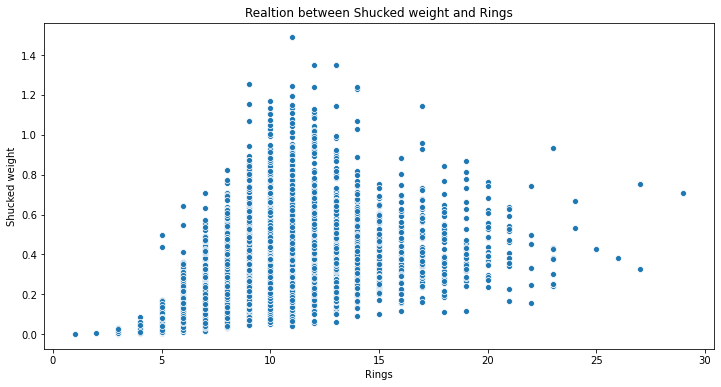

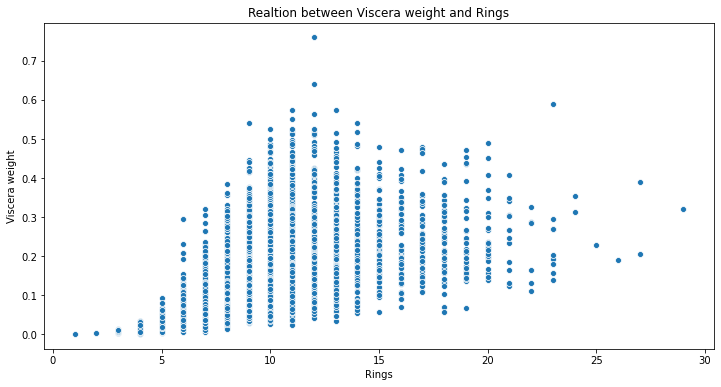

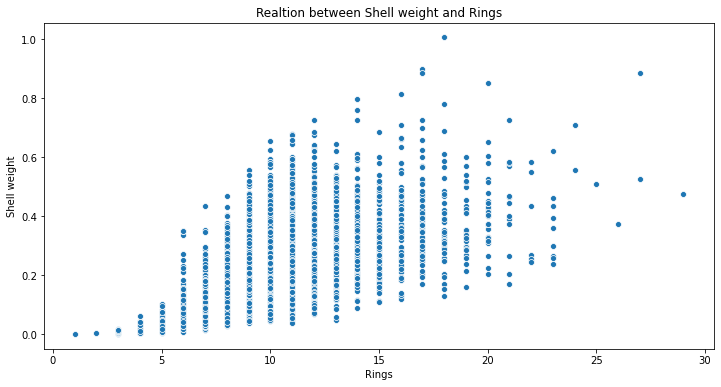

In [22]:
for col in columns:
    plt.figure(figsize = (12,6))
    plt.title("Realtion between {} and Rings".format(col))
    plt.xlabel("No of Rings")
    plt.ylabel(col)
    sns.scatterplot(ds['Rings'],ds[col])

By looking at the above graph we can easily tell the relation between the columns and the rings

In [23]:
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


lets see graphical representation for all the columns

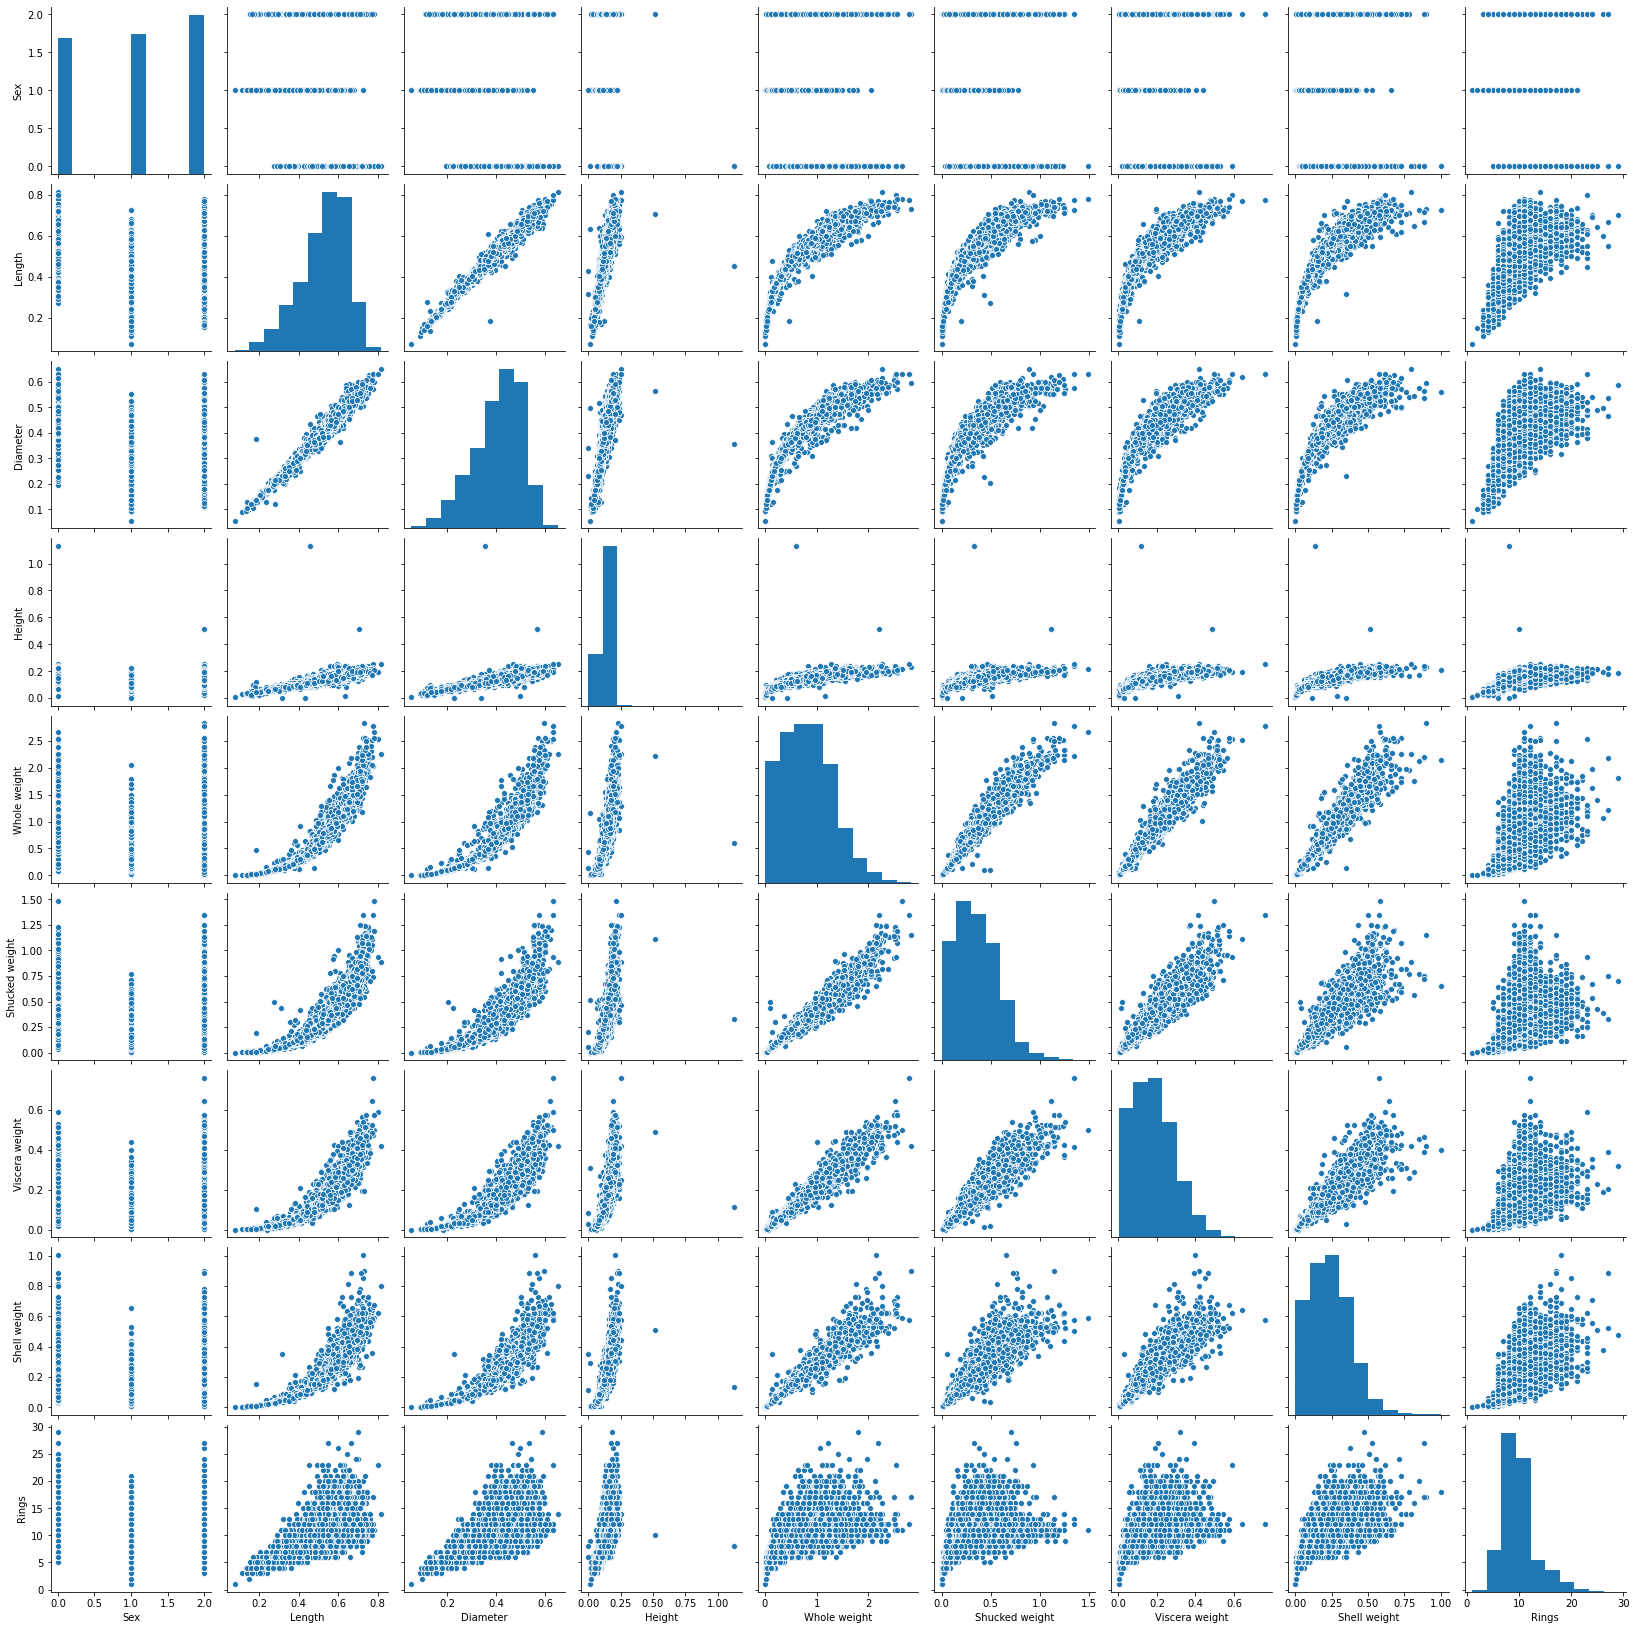

In [24]:
sns.pairplot(ds)

by looking at the above plot we can easily tell that which one has positive, negative, Neural relation with one another

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128ad1580>],
      dtype=object)

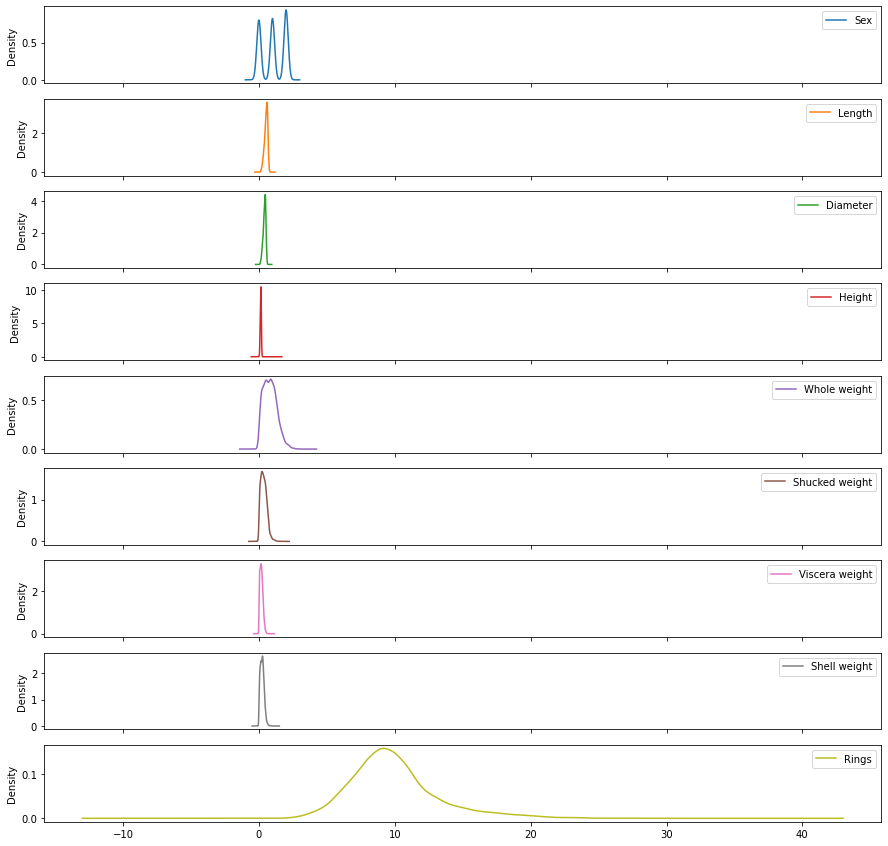

In [25]:
ds.plot(kind = 'kde', subplots = True, layout = (9,1), figsize = (15,15))

By looking at the above graph we figure out that there is some skewness in data so we will no see skewness of data usinf ds.skew() method

In [26]:
ds.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

We will take threshold skew value as +-5 and we will fix it accordingly

first lets see a density plot of all the columns

In [27]:
columns = ds.columns

In [28]:
columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

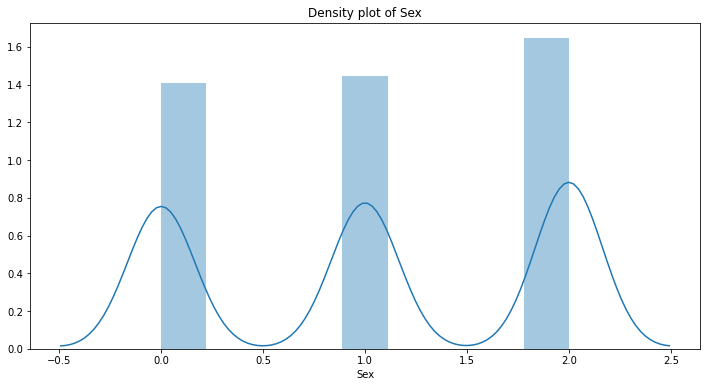

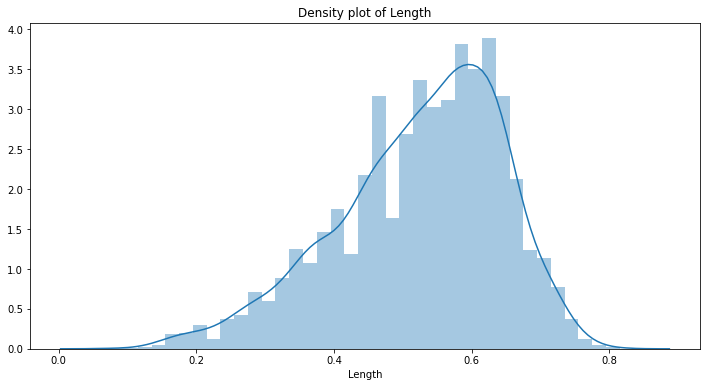

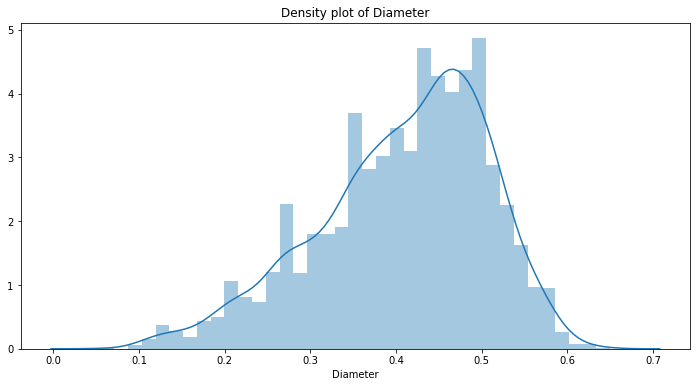

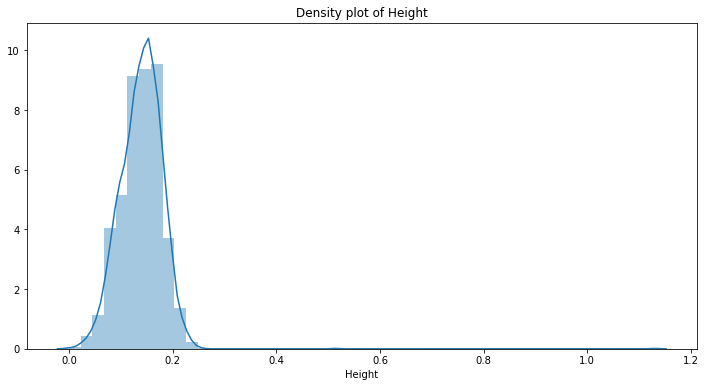

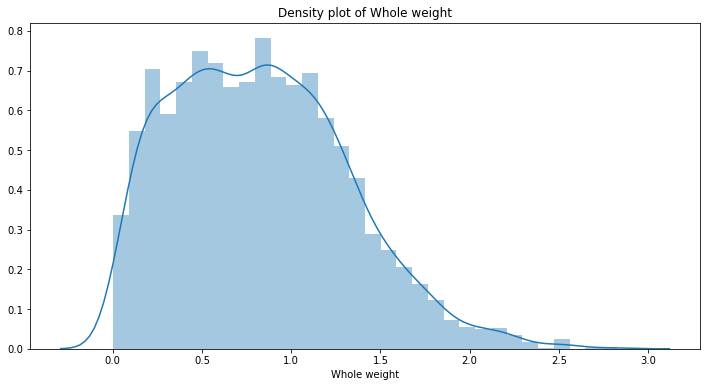

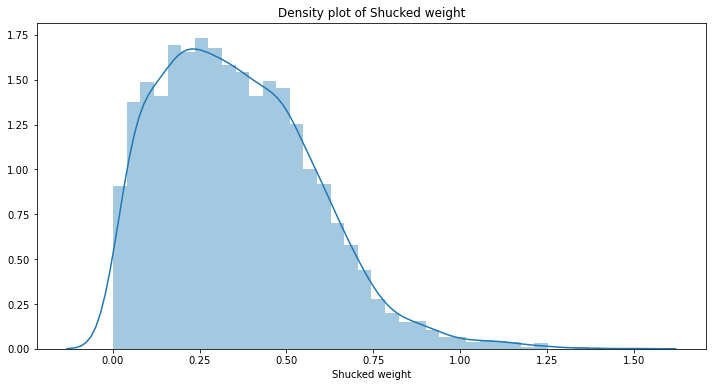

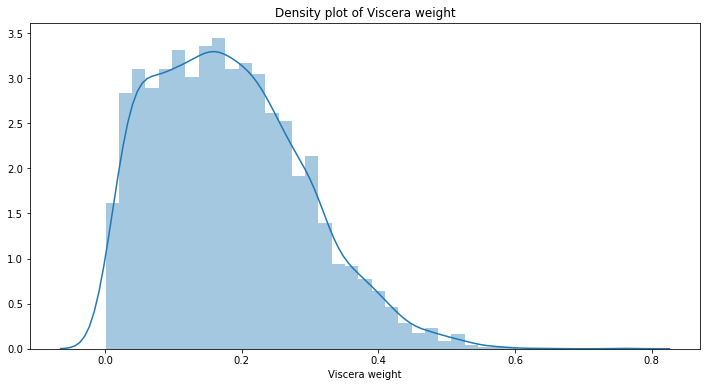

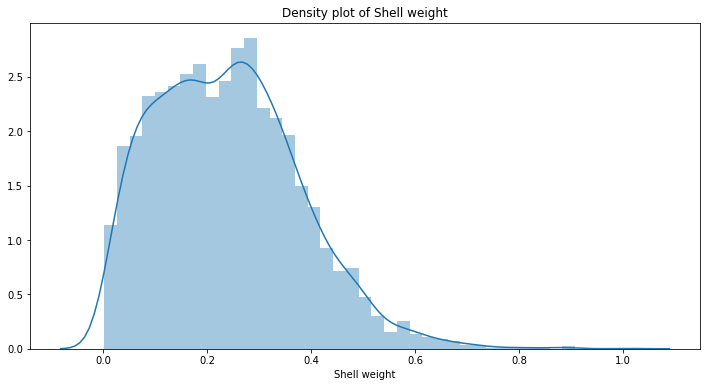

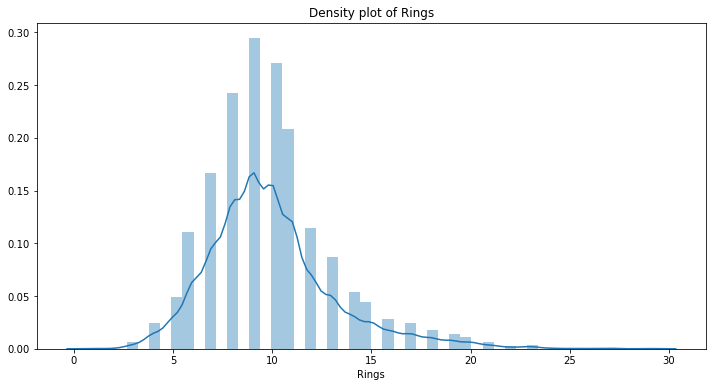

In [29]:
for col in columns:
    plt.figure(figsize = (12,6))
    plt.title("Density plot of {}".format(col))
    sns.distplot(ds[col])

By looking at the above graphical representation we figured out that some of them are normally distributed and some of them are left and some of them are right skewed now we have to fix the skewness by using power_transform/log/cube root/square root transformation

In [30]:
ds.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [31]:
columns = ds.columns
columns = columns.drop('Sex')

In [32]:
dsnew = power_transform(ds.drop('Sex', axis = 1))
dsnew = pd.DataFrame(dsnew, columns = columns)

In [33]:
dsnew.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135


Now lets check the skewness of data by using distplot

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Rings             0.004429
dtype: float64


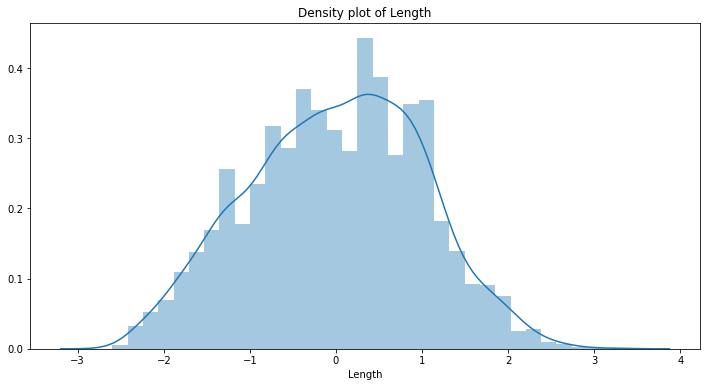

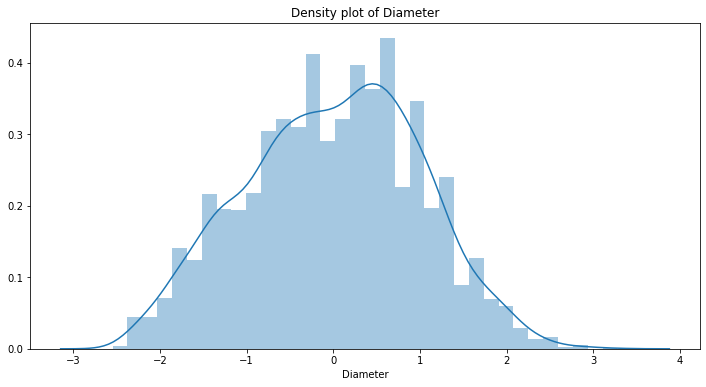

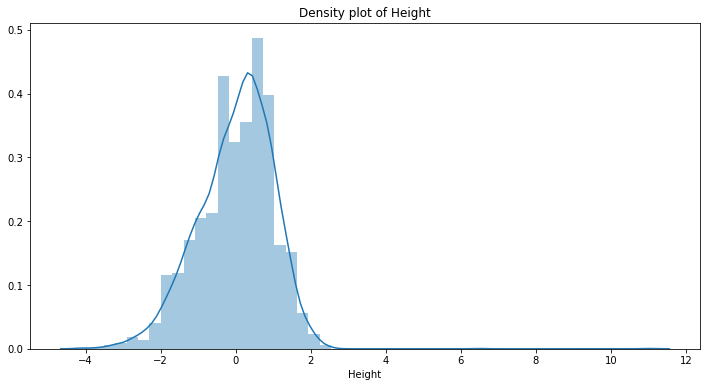

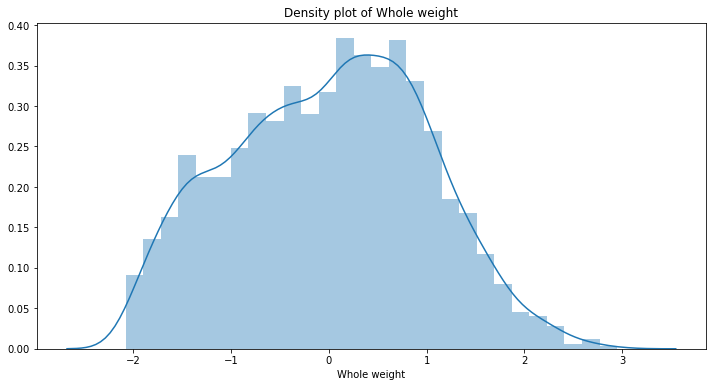

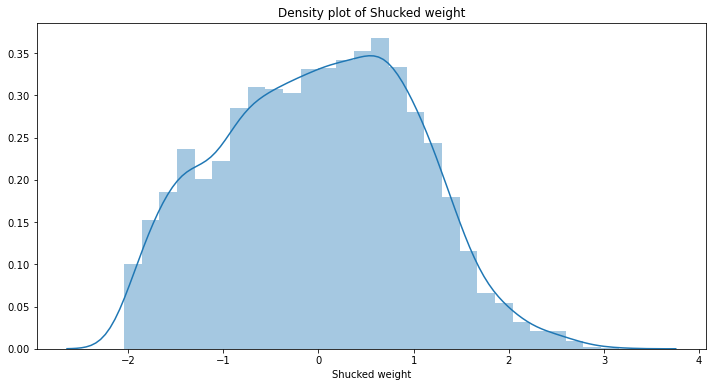

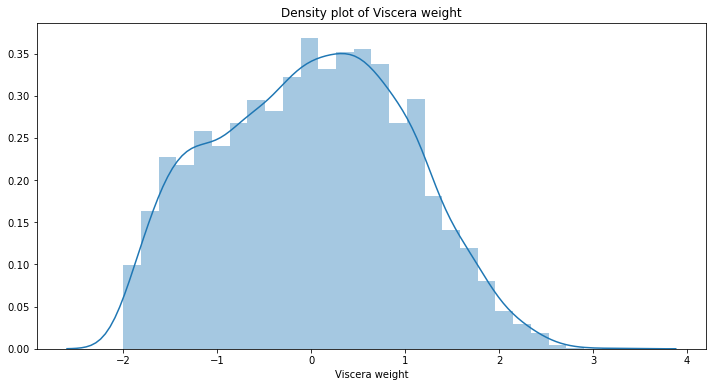

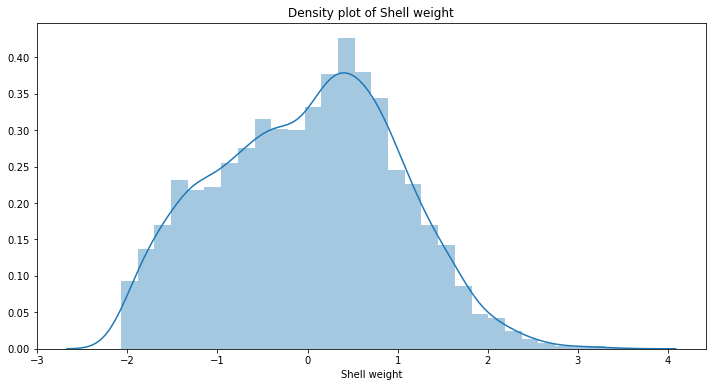

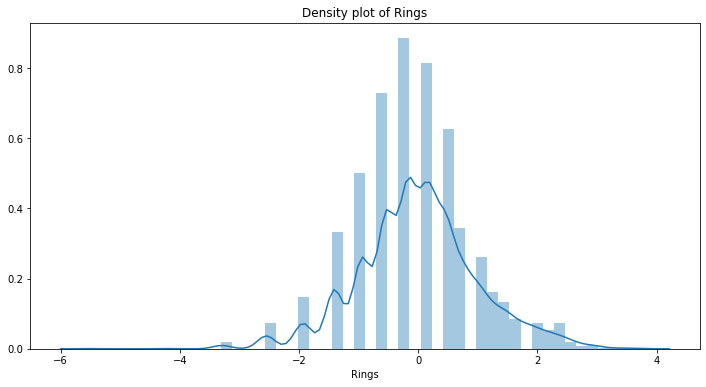

In [34]:
print(dsnew.skew())
for col in columns:
    plt.figure(figsize = (12,6))
    plt.title("Density plot of {}".format(col))
    sns.distplot(dsnew[col])

By looking at the above skewness of data we can tell that it has been normally skewed and now we can check if there is any outlier in the dataset or not

In [35]:
dsnew.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135


Lets see the correlation between all the column with one another

In [36]:
dsnew.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.982954,0.874099,0.972757,0.956482,0.953238,0.946681,0.609411
Diameter,0.982954,1.000000,0.880744,0.971244,0.949864,0.948235,0.953241,0.627972
Height,0.874099,0.880744,1.000000,0.893844,0.857753,0.875732,0.894305,0.668349
Whole weight,0.972757,0.971244,0.893844,1.000000,0.977466,0.974887,0.968830,0.629344
Shucked weight,0.956482,0.949864,0.857753,0.977466,1.000000,0.948587,0.917084,0.536797
Viscera weight,0.953238,0.948235,0.875732,0.974887,0.948587,1.000000,0.935002,0.602611
Shell weight,0.946681,0.953241,0.894305,0.968830,0.917084,0.935002,1.000000,0.693872
Rings,0.609411,0.627972,0.668349,0.629344,0.536797,0.602611,0.693872,1.000000


Lets see graphical representation of correlation

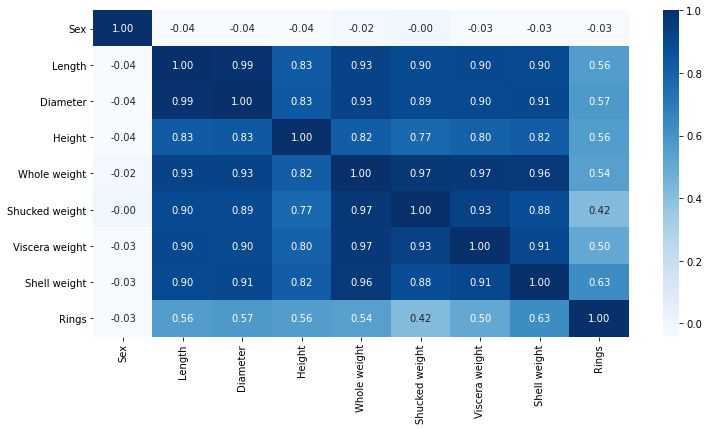

In [37]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.corr(), cmap='Blues', annot=True, fmt='.2f')

from above we can see the relation between all the columns with one another darker the area more the correlation

Now lets see if there is any outliers in the dataset using boxplot

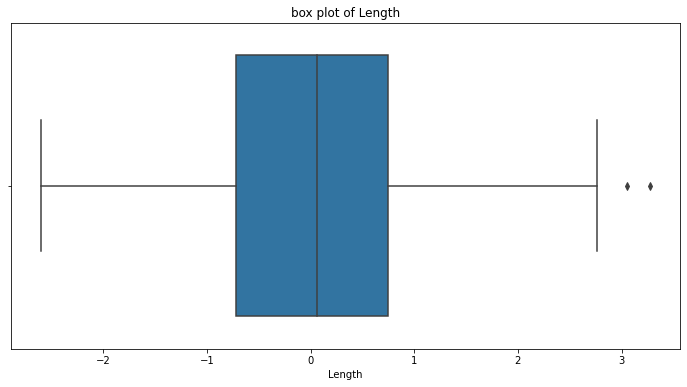

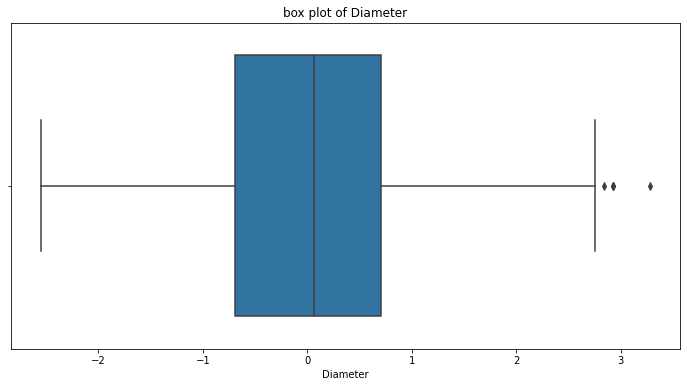

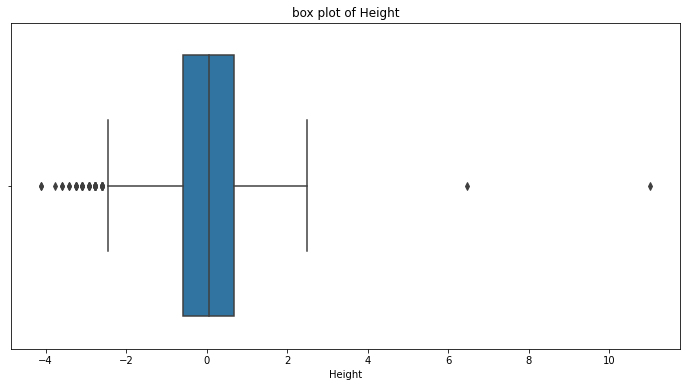

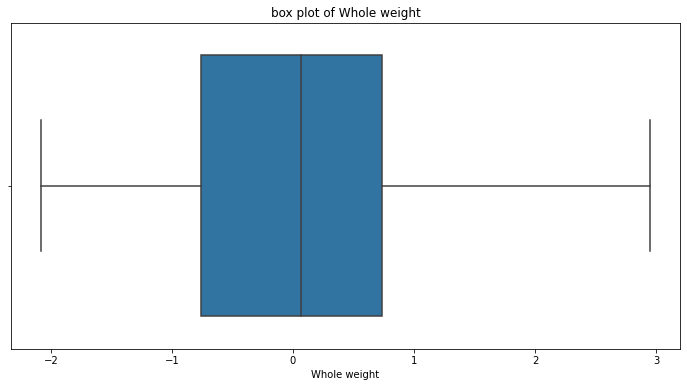

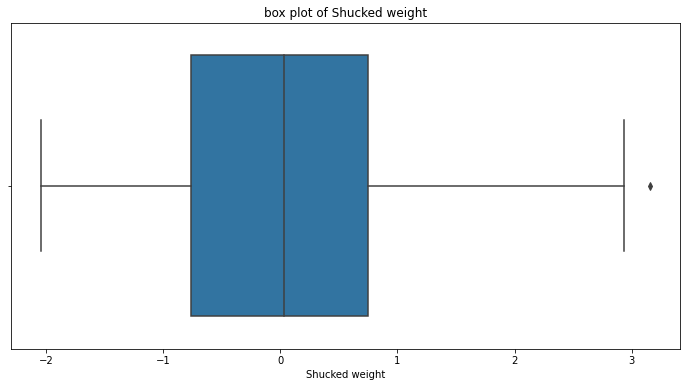

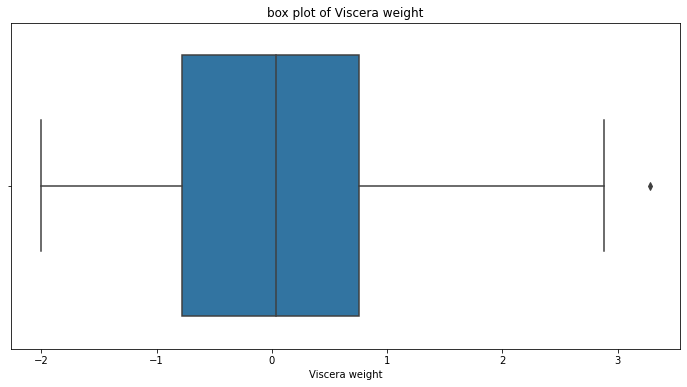

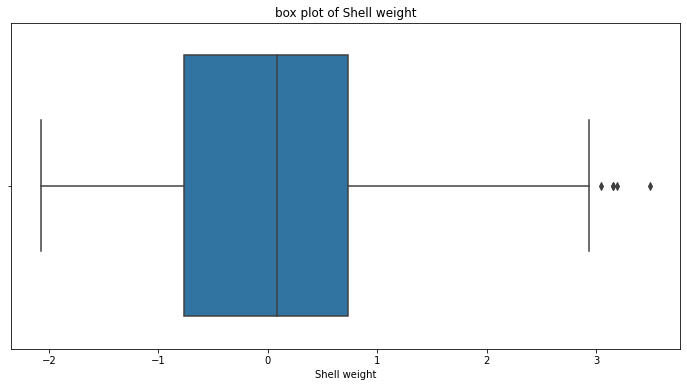

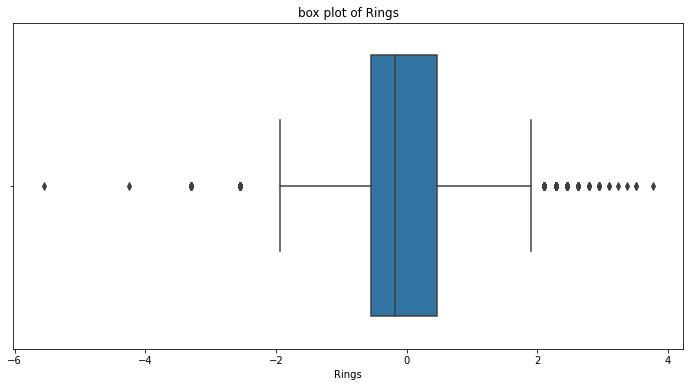

In [38]:
for col in columns:
    plt.figure(figsize = (12,6))
    plt.title("box plot of {}".format(col))
    sns.boxplot(dsnew[col])

By looking at the above graph we can easily see that there are outliers in the dataset lets use zscore to find out the outlier in the dataset

As we can see the outliers are very close to the line we will not remove the outlier and we will continue with the same dataset dsnew

In [39]:
dsnew.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,0.156908
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.949135


Now we will seperate out columns in two parts one for dependent variable and another for independent variable

In [40]:
X = dsnew.drop('Rings', axis = 1)
Y = dsnew['Rings']

as the data are in same scale we will not perform standard scaler or min max acaler

Now we will perform train_test_split for the data to obtain traning and testing data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 42)

We are using here a random state so now we will check it for random_state 42 and after that we will find out the best random state using for loop

In [42]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_train, Y_train))
predlr = lr.predict(X_test)
print("R2 Score:", r2_score(Y_test, predlr))
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Mean Absolute Error", mean_absolute_error(Y_test, predlr))

0.5807002348159546
R2 Score: 0.5939093293872495
Mean Squared Error: 0.41807626377734597
Mean Absolute Error 0.50359364461779


Now lets find the best random_state for the model

In [43]:
maxacc = 0
maxrs = 0
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    print("Traning Score:", lr.score(X_train, Y_train))
    predlr = lr.predict(X_test)
    acc = r2_score(Y_test, predlr)
    print("R2 Score:",r2_score(Y_test, predlr))
    print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
    print("Mean Absolute Error:", mean_absolute_error(Y_test, predlr))
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print("Maximum accuracy is {} at Random State {}".format(maxacc, maxrs))

Traning Score: 0.5782055217264981
R2 Score: 0.600456766078205
Mean Squared Error: 0.42015422342736075
Mean Absolute Error: 0.49702865449142036
Traning Score: 0.5866726559553272
R2 Score: 0.5734161763581623
Mean Squared Error: 0.41511005509691196
Mean Absolute Error: 0.4943916054341613
Traning Score: 0.5810982435944883
R2 Score: 0.5913556372778259
Mean Squared Error: 0.45273191668189894
Mean Absolute Error: 0.5008139489833496
Traning Score: 0.5916557031792902
R2 Score: 0.554000952916749
Mean Squared Error: 0.42635292320560664
Mean Absolute Error: 0.5042821497758933
Traning Score: 0.5875091035777489
R2 Score: 0.5698703893756804
Mean Squared Error: 0.40902178796573635
Mean Absolute Error: 0.49084259043587525
Traning Score: 0.5879416219131709
R2 Score: 0.5692474699617421
Mean Squared Error: 0.4373212511898191
Mean Absolute Error: 0.5137614573706288
Traning Score: 0.5808215087386559
R2 Score: 0.5950681198281482
Mean Squared Error: 0.41266344914308156
Mean Absolute Error: 0.4916329624733768


Traning Score: 0.5825296658433101
R2 Score: 0.5815793773132061
Mean Squared Error: 0.4313183515295561
Mean Absolute Error: 0.49664459992243926
Traning Score: 0.5825387160837316
R2 Score: 0.5880813268814842
Mean Squared Error: 0.4270995918804808
Mean Absolute Error: 0.495407899866358
Traning Score: 0.5899234651316959
R2 Score: 0.5603655119533241
Mean Squared Error: 0.4523695904848948
Mean Absolute Error: 0.5110611695628797
Traning Score: 0.5803603506894488
R2 Score: 0.5927137704444663
Mean Squared Error: 0.45929892384960863
Mean Absolute Error: 0.5121615046908621
Traning Score: 0.5886449779991356
R2 Score: 0.5551176651755472
Mean Squared Error: 0.4433250681594975
Mean Absolute Error: 0.5000624813651404
Traning Score: 0.5921183306688038
R2 Score: 0.5471953910955278
Mean Squared Error: 0.4571867265041423
Mean Absolute Error: 0.5038381312908451
Traning Score: 0.5843490890607264
R2 Score: 0.5830789184948658
Mean Squared Error: 0.4180018543614701
Mean Absolute Error: 0.49757826953031026
Tran

R2 Score: 0.5739155790749759
Mean Squared Error: 0.36754325660064197
Mean Absolute Error: 0.46493639162324724
Traning Score: 0.5791893823640668
R2 Score: 0.6007437645101695
Mean Squared Error: 0.4041068110331413
Mean Absolute Error: 0.47854046343200524
Traning Score: 0.5762249995460826
R2 Score: 0.6097324475960744
Mean Squared Error: 0.40690015113950073
Mean Absolute Error: 0.4933001828458501
Traning Score: 0.594983912294065
R2 Score: 0.540873931278614
Mean Squared Error: 0.45819451991312043
Mean Absolute Error: 0.5075697022236089
Traning Score: 0.5772993946671177
R2 Score: 0.607263699047814
Mean Squared Error: 0.4036108057538133
Mean Absolute Error: 0.4895517770341626
Traning Score: 0.5898392349646919
R2 Score: 0.5625961436128488
Mean Squared Error: 0.4243791991252234
Mean Absolute Error: 0.4944309265194211
Traning Score: 0.5935324740688792
R2 Score: 0.5388025255010549
Mean Squared Error: 0.448844972720238
Mean Absolute Error: 0.5015004608499838
Traning Score: 0.5827805290180958
R2 Sc

Traning Score: 0.5825244762027546
R2 Score: 0.5878816045406974
Mean Squared Error: 0.4496894645621198
Mean Absolute Error: 0.5161781627697236
Traning Score: 0.5838434959038469
R2 Score: 0.5844377399814993
Mean Squared Error: 0.4056928275740819
Mean Absolute Error: 0.4891407028524217
Traning Score: 0.5917044468367302
R2 Score: 0.5524435497477322
Mean Squared Error: 0.4277528325817099
Mean Absolute Error: 0.497259488048051
Traning Score: 0.581084126086076
R2 Score: 0.5911456737901833
Mean Squared Error: 0.42972931971867195
Mean Absolute Error: 0.5034121941459263
Traning Score: 0.580624840069399
R2 Score: 0.5942316656152236
Mean Squared Error: 0.44083152139645015
Mean Absolute Error: 0.514172026795404
Traning Score: 0.5804135902486134
R2 Score: 0.5948041408286855
Mean Squared Error: 0.42524485274326707
Mean Absolute Error: 0.509169689715951
Traning Score: 0.5813745062500495
R2 Score: 0.5929138959140676
Mean Squared Error: 0.4070531272715085
Mean Absolute Error: 0.48673932436207884
Traning

R2 Score: 0.5519697152122578
Mean Squared Error: 0.40360083796985785
Mean Absolute Error: 0.4944175618767743
Traning Score: 0.5856093963169849
R2 Score: 0.5783700262726993
Mean Squared Error: 0.39843775720788543
Mean Absolute Error: 0.4828052173589155
Traning Score: 0.5874032866932544
R2 Score: 0.5707766574880099
Mean Squared Error: 0.4104846060157121
Mean Absolute Error: 0.48378929035328117
Traning Score: 0.5895553565515376
R2 Score: 0.5587632229375051
Mean Squared Error: 0.40855838526935345
Mean Absolute Error: 0.48777514028059743
Traning Score: 0.5757608406366133
R2 Score: 0.6138136217118972
Mean Squared Error: 0.3816470412440691
Mean Absolute Error: 0.4766855452327364
Traning Score: 0.5809770717193459
R2 Score: 0.5940339682833131
Mean Squared Error: 0.42724802315239185
Mean Absolute Error: 0.5052640916241473
Traning Score: 0.5812239452246046
R2 Score: 0.5926994137448292
Mean Squared Error: 0.4044550145444222
Mean Absolute Error: 0.48081569600866697
Traning Score: 0.5849947230979891

Traning Score: 0.586125878576232
R2 Score: 0.5766021447368697
Mean Squared Error: 0.42082657767672765
Mean Absolute Error: 0.49710964010457975
Traning Score: 0.5854143015055358
R2 Score: 0.5761485896907753
Mean Squared Error: 0.43084619222123055
Mean Absolute Error: 0.49878013279992794
Traning Score: 0.5797560663969954
R2 Score: 0.598872204905792
Mean Squared Error: 0.4034192457498268
Mean Absolute Error: 0.486453002655664
Traning Score: 0.5804740610788682
R2 Score: 0.5958087575594848
Mean Squared Error: 0.42369280936550313
Mean Absolute Error: 0.49436385130089283
Traning Score: 0.5670862363784607
R2 Score: 0.6376079145976934
Mean Squared Error: 0.3900872919826028
Mean Absolute Error: 0.4806580903658369
Traning Score: 0.5830506161045798
R2 Score: 0.5862545973734125
Mean Squared Error: 0.4128547525544448
Mean Absolute Error: 0.5019851561872486
Traning Score: 0.588961805756566
R2 Score: 0.5602016041791933
Mean Squared Error: 0.39236652794438476
Mean Absolute Error: 0.48481634438672266
Tr

Traning Score: 0.5797090121772404
R2 Score: 0.6001761040651268
Mean Squared Error: 0.38266020776509735
Mean Absolute Error: 0.47911667660533475
Traning Score: 0.5878065924367895
R2 Score: 0.5681732375347256
Mean Squared Error: 0.3908100246885933
Mean Absolute Error: 0.4784175739042767
Traning Score: 0.5891797161653363
R2 Score: 0.5613275353892804
Mean Squared Error: 0.4120177346732035
Mean Absolute Error: 0.48936946856613134
Traning Score: 0.5843198168517837
R2 Score: 0.5825620236639866
Mean Squared Error: 0.41547872190683194
Mean Absolute Error: 0.4970292563620594
Traning Score: 0.5854429018244265
R2 Score: 0.5766461323530834
Mean Squared Error: 0.3903776051568123
Mean Absolute Error: 0.48119382534809274
Traning Score: 0.578582673673233
R2 Score: 0.6035815857364177
Mean Squared Error: 0.37811950709917375
Mean Absolute Error: 0.47239299093494375
Traning Score: 0.5907647325917689
R2 Score: 0.55888242186578
Mean Squared Error: 0.42402835880288936
Mean Absolute Error: 0.498687850787363
Tr

Traning Score: 0.582035569389233
R2 Score: 0.5903464536787906
Mean Squared Error: 0.39235673931241816
Mean Absolute Error: 0.4836423152580696
Traning Score: 0.5870861149038193
R2 Score: 0.5720477828276567
Mean Squared Error: 0.42300633763700224
Mean Absolute Error: 0.48946609921467055
Traning Score: 0.5816080238193171
R2 Score: 0.5922894103476407
Mean Squared Error: 0.3999559143612195
Mean Absolute Error: 0.4906050075885027
Traning Score: 0.5918902604843925
R2 Score: 0.5532318626088115
Mean Squared Error: 0.42668890450918356
Mean Absolute Error: 0.49714604156171754
Traning Score: 0.5842177614898003
R2 Score: 0.5828634460211488
Mean Squared Error: 0.40389426744562107
Mean Absolute Error: 0.49207568422702125
Traning Score: 0.575245312714385
R2 Score: 0.6125548239482741
Mean Squared Error: 0.4000932436374335
Mean Absolute Error: 0.48253563446328535
Traning Score: 0.5857390254875423
R2 Score: 0.5690334604045251
Mean Squared Error: 0.4327784888192415
Mean Absolute Error: 0.4963799710193019


Traning Score: 0.5848872677674521
R2 Score: 0.5757217740039301
Mean Squared Error: 0.4102260520780128
Mean Absolute Error: 0.490440259196883
Traning Score: 0.5889758205126188
R2 Score: 0.5630573035146091
Mean Squared Error: 0.4387665743552314
Mean Absolute Error: 0.5047083081263427
Traning Score: 0.5821366301404773
R2 Score: 0.5903882820642918
Mean Squared Error: 0.393093066660432
Mean Absolute Error: 0.48352293136802094
Traning Score: 0.5800622271329883
R2 Score: 0.5967485993653919
Mean Squared Error: 0.4226460982111122
Mean Absolute Error: 0.4927133179692951
Traning Score: 0.591144360084003
R2 Score: 0.5596770283167043
Mean Squared Error: 0.48411080325366185
Mean Absolute Error: 0.52565518631421
Traning Score: 0.5777968612257965
R2 Score: 0.6016238784367428
Mean Squared Error: 0.4454996193512325
Mean Absolute Error: 0.5164195919455541
Traning Score: 0.5893710114882905
R2 Score: 0.5650769109815779
Mean Squared Error: 0.4549315481756675
Mean Absolute Error: 0.5171150100194893
Traning S

Traning Score: 0.5855300673380817
R2 Score: 0.5783463885790127
Mean Squared Error: 0.4447901980727827
Mean Absolute Error: 0.5105930772937415
Traning Score: 0.5777922240162502
R2 Score: 0.6009581362972979
Mean Squared Error: 0.4477615492952627
Mean Absolute Error: 0.5205969368062189
Traning Score: 0.5845585049211528
R2 Score: 0.5821777234899727
Mean Squared Error: 0.39301814560883963
Mean Absolute Error: 0.47992917990836553
Traning Score: 0.5870261051922477
R2 Score: 0.569728304295245
Mean Squared Error: 0.42451722728671737
Mean Absolute Error: 0.5064755916980725
Traning Score: 0.5716692384755261
R2 Score: 0.620540423519431
Mean Squared Error: 0.4213865987913472
Mean Absolute Error: 0.49999270512848054
Traning Score: 0.5948588201214817
R2 Score: 0.5387149866885867
Mean Squared Error: 0.4394849527416735
Mean Absolute Error: 0.5081627255752243
Traning Score: 0.5821670845709452
R2 Score: 0.5908063426017258
Mean Squared Error: 0.423082469850967
Mean Absolute Error: 0.5074661263255292
Trani

R2 Score: 0.565407758599686
Mean Squared Error: 0.41498560179349253
Mean Absolute Error: 0.4941541791325837
Traning Score: 0.5807099755834122
R2 Score: 0.5944899592218492
Mean Squared Error: 0.4155473132340935
Mean Absolute Error: 0.49735650329814846
Traning Score: 0.5878857009242338
R2 Score: 0.5673335121333689
Mean Squared Error: 0.3889445448533537
Mean Absolute Error: 0.48125838787110287
Traning Score: 0.5821449504947749
R2 Score: 0.5888660430935985
Mean Squared Error: 0.4574388810454403
Mean Absolute Error: 0.5096559596188617
Traning Score: 0.5865277885839144
R2 Score: 0.5716277097993894
Mean Squared Error: 0.39949712617336797
Mean Absolute Error: 0.49449472577607806
Traning Score: 0.5753062458749578
R2 Score: 0.6118065444045587
Mean Squared Error: 0.40978200102288626
Mean Absolute Error: 0.49435830260712327
Traning Score: 0.5882107035441004
R2 Score: 0.5688152741248744
Mean Squared Error: 0.41400230154720474
Mean Absolute Error: 0.49802436607256617
Traning Score: 0.580635634266369

Traning Score: 0.5775843566774279
R2 Score: 0.6029756045095525
Mean Squared Error: 0.4167932571355987
Mean Absolute Error: 0.4937129843642569
Traning Score: 0.59075804866072
R2 Score: 0.5557014519764363
Mean Squared Error: 0.4210576848469304
Mean Absolute Error: 0.48691019319507556
Traning Score: 0.5867286194254325
R2 Score: 0.5701758053809961
Mean Squared Error: 0.4261084521870258
Mean Absolute Error: 0.5067986849500097
Traning Score: 0.5876489082913984
R2 Score: 0.5717086416697454
Mean Squared Error: 0.4432157383936706
Mean Absolute Error: 0.5190376837551699
Traning Score: 0.5792750423287318
R2 Score: 0.6002224083612835
Mean Squared Error: 0.4173309837965766
Mean Absolute Error: 0.4998450945701285
Traning Score: 0.5804362632674063
R2 Score: 0.5964326669628386
Mean Squared Error: 0.39133555012503873
Mean Absolute Error: 0.489506323962128
Traning Score: 0.5902043298585833
R2 Score: 0.5574793352817642
Mean Squared Error: 0.4497170519094057
Mean Absolute Error: 0.5019720906020452
Traning

R2 Score: 0.5807169138010477
Mean Squared Error: 0.4029528691231894
Mean Absolute Error: 0.49069495880819625
Traning Score: 0.5832123302402927
R2 Score: 0.5858817178670663
Mean Squared Error: 0.41286243980245296
Mean Absolute Error: 0.48787577979988933
Traning Score: 0.584358254799881
R2 Score: 0.5804151813868496
Mean Squared Error: 0.4011506164846501
Mean Absolute Error: 0.484651536010739
Traning Score: 0.5849456593236932
R2 Score: 0.5777239769073322
Mean Squared Error: 0.4188070131018258
Mean Absolute Error: 0.4922610533004895
Traning Score: 0.5780852716312872
R2 Score: 0.603201483898666
Mean Squared Error: 0.40561373885827895
Mean Absolute Error: 0.48384549224576356
Traning Score: 0.578442285603803
R2 Score: 0.6022089615164377
Mean Squared Error: 0.3997145645371198
Mean Absolute Error: 0.48986009749452303
Traning Score: 0.5933879728237024
R2 Score: 0.5479605139103614
Mean Squared Error: 0.43404186551493973
Mean Absolute Error: 0.5018520513017942
Traning Score: 0.5852750443758001
R2 

Traning Score: 0.5796686115552312
R2 Score: 0.5963825288793847
Mean Squared Error: 0.4255492490107513
Mean Absolute Error: 0.5035806080305819
Traning Score: 0.586332528537371
R2 Score: 0.5758040827184487
Mean Squared Error: 0.41912835278965677
Mean Absolute Error: 0.5044702581253542
Traning Score: 0.5823710324681298
R2 Score: 0.5904840257661725
Mean Squared Error: 0.4045969933032436
Mean Absolute Error: 0.486604777817898
Traning Score: 0.5871995394380094
R2 Score: 0.5711494661145777
Mean Squared Error: 0.4204273531670103
Mean Absolute Error: 0.49939299627379347
Traning Score: 0.5906056872006284
R2 Score: 0.5633164573524596
Mean Squared Error: 0.48156209947322665
Mean Absolute Error: 0.5229591102138083
Traning Score: 0.5725396637876694
R2 Score: 0.6229946430951054
Mean Squared Error: 0.38541127500681643
Mean Absolute Error: 0.47708498432736424
Traning Score: 0.5871072042149195
R2 Score: 0.5713962418756715
Mean Squared Error: 0.46173705937878246
Mean Absolute Error: 0.5146925378111213
Tr

Traning Score: 0.5789271938356517
R2 Score: 0.6018326712222148
Mean Squared Error: 0.398738827318812
Mean Absolute Error: 0.48931371951410285
Traning Score: 0.5734832243727614
R2 Score: 0.6206936194156945
Mean Squared Error: 0.3742730694063822
Mean Absolute Error: 0.47781531962567086
Traning Score: 0.5830094186659611
R2 Score: 0.5865028489553477
Mean Squared Error: 0.40418888710917095
Mean Absolute Error: 0.4789907927034262
Traning Score: 0.5902177395359577
R2 Score: 0.5504988374530477
Mean Squared Error: 0.40617918018679583
Mean Absolute Error: 0.48580485571924065
Traning Score: 0.5878443165359399
R2 Score: 0.5657686363100652
Mean Squared Error: 0.4290076114816956
Mean Absolute Error: 0.4933482661100826
Traning Score: 0.5828021470635123
R2 Score: 0.5869148513383792
Mean Squared Error: 0.40692218749114073
Mean Absolute Error: 0.49870367267384963
Traning Score: 0.5784104528855304
R2 Score: 0.5980809845253308
Mean Squared Error: 0.4284685254865081
Mean Absolute Error: 0.5032154584442456


Traning Score: 0.5847151588074107
R2 Score: 0.5747190368482351
Mean Squared Error: 0.4435801014114939
Mean Absolute Error: 0.501827097047162
Traning Score: 0.5946805807842467
R2 Score: 0.544247830823058
Mean Squared Error: 0.4437202650545774
Mean Absolute Error: 0.5029356613727731
Traning Score: 0.5842396182760741
R2 Score: 0.5819682514808191
Mean Squared Error: 0.405824041055268
Mean Absolute Error: 0.4933119197040914
Traning Score: 0.5801259891009335
R2 Score: 0.5958752435402981
Mean Squared Error: 0.3965620178472466
Mean Absolute Error: 0.47403454752333435
Traning Score: 0.582963016620995
R2 Score: 0.5853207487573197
Mean Squared Error: 0.4414739828225255
Mean Absolute Error: 0.516321714583377
Traning Score: 0.5808498768317037
R2 Score: 0.592608838462428
Mean Squared Error: 0.4514868354702066
Mean Absolute Error: 0.5195971377693754
Traning Score: 0.5855747274783902
R2 Score: 0.5710377608195354
Mean Squared Error: 0.42756406005343606
Mean Absolute Error: 0.49262395052869223
Traning S

R2 Score: 0.5884142051273863
Mean Squared Error: 0.41391129878082794
Mean Absolute Error: 0.49213816550157136
Traning Score: 0.5795585645832583
R2 Score: 0.598515452331869
Mean Squared Error: 0.4164163558515434
Mean Absolute Error: 0.49548628415909357
Maximum accuracy is 0.6376079145976934 at Random State 316


now we will set the random state as 316 and check for each and every model and lets see which one performes well

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 316)

In [45]:
model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor()]

In [46]:
for m in model:
    print("Model Name", m)
    m.fit(X_train, Y_train)
    print("Traning Score:", m.score(X_train, Y_train))
    pred = m.predict(X_test)
    print("R2 Score",r2_score(Y_test, pred))
    print("Mean Squared Error:", mean_squared_error(Y_test, pred))
    print("Mean absolute Error:", mean_absolute_error(Y_test, pred))
    print('\n')

Model Name LinearRegression()
Traning Score: 0.5670862363784607
R2 Score 0.6376079145976934
Mean Squared Error: 0.3900872919826028
Mean absolute Error: 0.4806580903658369


Model Name DecisionTreeRegressor()
Traning Score: 1.0
R2 Score 0.33675212685147937
Mean Squared Error: 0.7139354780955173
Mean absolute Error: 0.6291495945049017


Model Name RandomForestRegressor()
Traning Score: 0.9438518381640176
R2 Score 0.6749345280182499
Mean Squared Error: 0.3499080548120614
Mean absolute Error: 0.45266405416829486


Model Name AdaBoostRegressor()
Traning Score: 0.529645407902726
R2 Score 0.5681754530470009
Mean Squared Error: 0.46482601281290997
Mean absolute Error: 0.5608016558591583


Model Name SVR()
Traning Score: 0.6331446766672921
R2 Score 0.6876796097533979
Mean Squared Error: 0.33618895160747136
Mean absolute Error: 0.4386677007675224


Model Name KNeighborsRegressor()
Traning Score: 0.6971189432996099
R2 Score 0.6221851973695762
Mean Squared Error: 0.4066886644762951
Mean absolute E

lets check the accuracy score one by one and then we will check the cross validation score and after checking it we will see the difference between the cross validation score and actual accuracy score after looking at the difference we will be deciding which model is doing good and then we will proceed with that model

In [47]:
model

[LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 SVR(),
 KNeighborsRegressor()]

In [48]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100 
print("R2 Score:", r2_score(Y_test, predlr))
print("Mean Squared Error:", mean_squared_error(Y_test, predlr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predlr))

R2 Score: 0.6376079145976934
Mean Squared Error: 0.3900872919826028
Mean Absolute Error: 0.4806580903658369


In [49]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100 
print("R2 Score:", r2_score(Y_test, predtr))
print("Mean Squared Error:", mean_squared_error(Y_test, predtr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predtr))

R2 Score: 0.33496756942203265
Mean Squared Error: 0.715856417329793
Mean Absolute Error: 0.6319989835008172


In [50]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("R2 Score:", r2_score(Y_test, predrfr))
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predrfr))

R2 Score: 0.6760542480764317
Mean Squared Error: 0.348702762028722
Mean Absolute Error: 0.4532568058995211


In [51]:
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("R2 Score:", r2_score(Y_test, predadb))
print("Mean Squared Error:", mean_squared_error(Y_test, predadb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predadb))

R2 Score: 0.5760848339909683
Mean Squared Error: 0.4563121707121205
Mean Absolute Error: 0.5460655104899788


In [52]:
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("R2 Score:", r2_score(Y_test, predsvr))
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predsvr))

R2 Score: 0.6876796097533979
Mean Squared Error: 0.33618895160747136
Mean Absolute Error: 0.4386677007675224


In [53]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("R2 Score:", r2_score(Y_test, predknn))
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predknn))

R2 Score: 0.6221851973695762
Mean Squared Error: 0.4066886644762951
Mean Absolute Error: 0.4868039228471508


Lets start with cross validation Score

In [54]:
scorelr = cross_val_score(lr, X, Y, cv = 5)
scorelr = scorelr.mean()*100
print(scorelr)

51.29364673997466


In [55]:
scoredtr = cross_val_score(dtr, X, Y, cv = 5)
scoredtr = scoredtr.mean()*100

In [56]:
scorerfr = cross_val_score(rfr, X, Y, cv= 5)
scorerfr = scorerfr.mean()*100

In [57]:
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100

In [58]:
scoresvr = cross_val_score(svr, X, Y, cv = 5)
scoresvr = scoresvr.mean()*100

In [59]:
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100

In [60]:
diff = {"Model Name":['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'AdaBoost', 'SVR' ,'KNNeighbour'],
       "Accuracy Score": [acclr, accdtr, accrfr, accadb, accsvr,accknn],
       "Cross Validation Score":[scorelr,scoredtr,scorerfr,scoreadb,scoresvr,scoreknn],
       "Acc - CV":[acclr-scorelr,accdtr-scoredtr,accrfr-scorerfr,accadb-scoreadb,accsvr-scoresvr,accknn-scoreknn]}

In [61]:
diff = pd.DataFrame.from_dict(diff)

In [62]:
diff

,Model Name,Accuracy Score,Cross Validation Score,Acc - CV
0,Linear Regression,63.760791,51.293647,12.467145
1,Decision Tree Regressor,33.496757,13.422861,20.073896
2,Random Forest Regressor,67.605425,55.279129,12.326296
3,AdaBoost,57.608483,36.397532,21.210952
4,SVR,68.767961,59.162498,9.605463
5,KNNeighbour,62.218520,49.232169,12.986351


From above we can see that SVR is the best model for this data lets perform GridSearchCV for SVR

In [63]:
parameter = {
    'kernel':['linear','poly','rbf'],
    'gamma':['scale','auto'],
    'C':[10,20]
}

In [64]:
GSCV = GridSearchCV(svr, parameter)

In [65]:
GSCV.fit(X_train, Y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10, 20], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [66]:
GSCV_predict = GSCV.best_estimator_.predict(X_test)

In [67]:
print("R2 Score", r2_score(Y_test, GSCV_predict))
print("Mean Squared Error:", mean_squared_error(Y_test, GSCV_predict))
print("Mean absolute Error:", mean_absolute_error(Y_test, GSCV_predict))

R2 Score 0.6931705609902346
Mean Squared Error: 0.3302783636430343
Mean absolute Error: 0.43739799821929604


After applying GridSearchCV we see that the model accuracy has been increased from 59% to 69% now we will see how much percentage we have increased the accuracy score

In [69]:
(69.31-59.16)/59.16*100

17.15686274509805

We can see that we have increased 17% of the original accuracy score

now lets save the model as we are getting heighest accuracy

In [71]:
joblib.dump(GSCV.best_estimator_, 'Abalone_Case_Study.pkl')

['Abalone_Case_Study.pkl']